In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
sns.set_theme(context='notebook',style='white',rc={'figure.figsize': (11,8.5)})

In [8]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [13]:
iris_df.target.value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

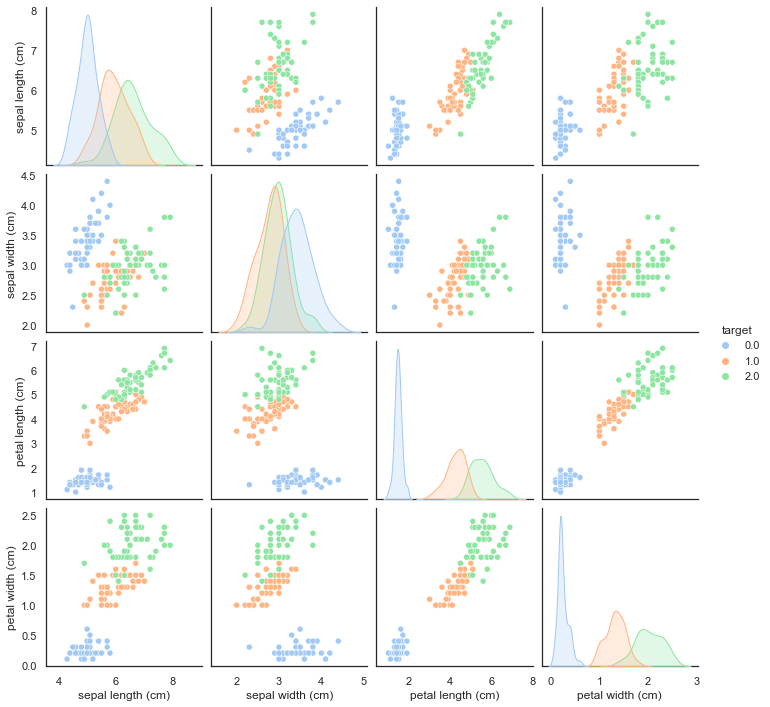

In [19]:
sns.pairplot(iris_df, hue='target',palette='pastel')

In [20]:
import umap

In [21]:
reducer = umap.UMAP()

In [22]:
iris_data = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
scaled_iris_data = StandardScaler().fit_transform(iris_data)

In [23]:
embedding = reducer.fit_transform(scaled_iris_data)
embedding.shape

(150, 2)

Text(0.5, 1.0, 'UMAP Projection of Iris Dataset')

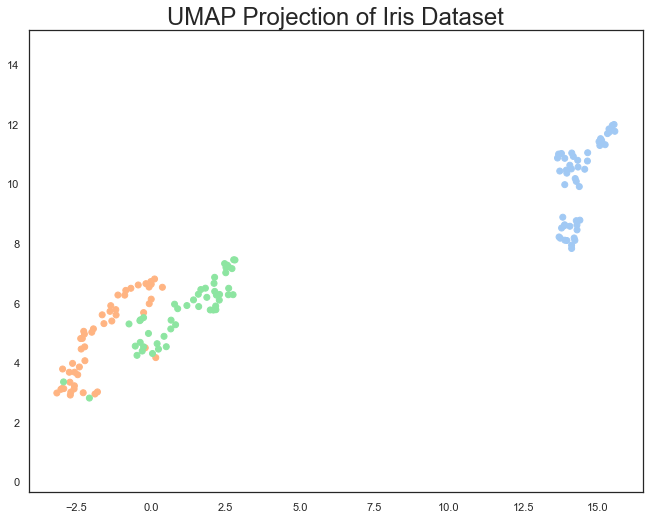

In [36]:
plt.scatter(embedding[:,0], embedding[:,1], c=[sns.color_palette(palette='pastel')[int(x)] for x in iris_df.target])
plt.gca().set_aspect('equal','datalim')
plt.title('UMAP Projection of Iris Dataset', fontsize=24)